In [1]:
import io
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
codigos = {
    "algodao":39429,
    "milho_1a":39441,
    "milho_2a":39442,
    "soja":39443,
    "trigo":39445,
    "cafe_total":40527,
    "cafe_arabica":39454,
    "cafe_conilon":39455,
    "cana_acucar":39456,
}

In [3]:
codigo = codigos['soja']

In [4]:
# Aqui tem HELP da tabela e descrição dos campos!!!
# http://api.sidra.ibge.gov.br/
# http://api.sidra.ibge.gov.br/home/ajuda
# http://api.sidra.ibge.gov.br/desctabapi.aspx?c=6588

'''
1618 (ultimo mês), 1612 (até último ano), 6588 (completo)
https://www.ibge.gov.br/estatisticas/economicas/agricultura-e-pecuaria/9201-levantamento-sistematico-da-producao-agricola.html?=&t=resultados
https://www.ibge.gov.br/estatisticas/sociais/populacao/9201-levantamento-sistematico-da-producao-agricola.html?edicao=20757&t=series-historicas
https://dados.gov.br/dataset/la-levantamento-sistematico-da-producao-agricola-lspa
https://www.ibge.gov.br/estatisticas/economicas/agricultura-epecuaria/9201-levantamento-sistematico-da-producao-agricola.html?edicao=22942&t=downloads
'''
# url = 'http://api.sidra.ibge.gov.br/values/t/1618/n1/all/v/all/p/all/c49/all/c48/all?formato=json'

'\n1618 (ultimo mês), 1612 (até último ano), 6588 (completo)\nhttps://www.ibge.gov.br/estatisticas/economicas/agricultura-e-pecuaria/9201-levantamento-sistematico-da-producao-agricola.html?=&t=resultados\nhttps://www.ibge.gov.br/estatisticas/sociais/populacao/9201-levantamento-sistematico-da-producao-agricola.html?edicao=20757&t=series-historicas\nhttps://dados.gov.br/dataset/la-levantamento-sistematico-da-producao-agricola-lspa\nhttps://www.ibge.gov.br/estatisticas/economicas/agricultura-epecuaria/9201-levantamento-sistematico-da-producao-agricola.html?edicao=22942&t=downloads\n'

In [5]:
url = f'http://api.sidra.ibge.gov.br/values/t/6588/n1/all/v/all/p/all/c48/{codigo}?formato=json'

df=pd.read_json(url)
cod_table = df.iloc[0]
df = df[1:]
df.V = pd.to_numeric(df.V)

In [6]:
cod_table

NC        Nível Territorial (Código)
NN                 Nível Territorial
D1C                  Brasil (Código)
D1N                           Brasil
D2C                Variável (Código)
D2N                         Variável
D3C                     Mês (Código)
D3N                              Mês
D4C    Produto das lavouras (Código)
D4N             Produto das lavouras
MC        Unidade de Medida (Código)
MN                 Unidade de Medida
V                              Valor
Name: 0, dtype: object

Área plantada


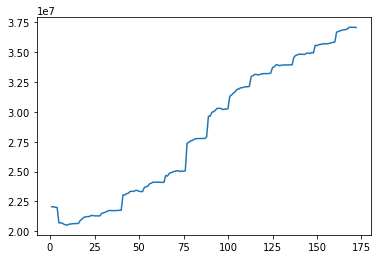

Área colhida


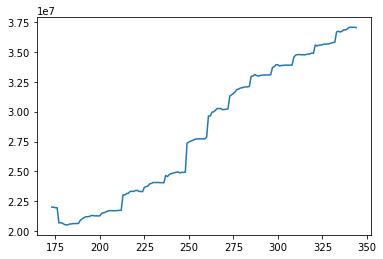

Produção


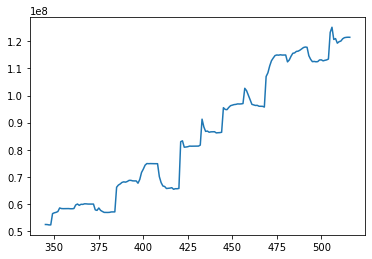

Rendimento médio


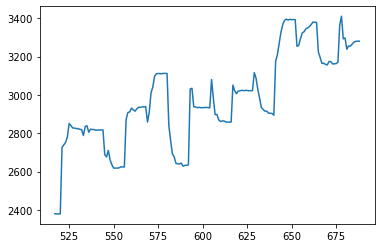

In [7]:
for stats in df.D2N.unique():
    print(stats)
    df[df.D2N == stats].V.plot()
    plt.show()

In [40]:
# Organiza Série de rendimento por data
df_rendimento = df[df['D2N'] == "Rendimento médio"].copy()
df_rendimento['D3C'] = df_rendimento['D3C'].str.slice(0,4) + "-" + df_rendimento['D3C'].str.slice(4,10)
df_rendimento = df_rendimento.filter(['D3C','V'])
df_rendimento.D3C = pd.to_datetime(df_rendimento.D3C, yearfirst=True)

In [44]:
df_rendimento.columns = ['data','valor']
df_rendimento.set_index('data', inplace=True)

In [49]:
df_rendimento.to_pickle('../dados/rendimento_soja.p')